In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from surprise.prediction_algorithms.matrix_factorization import NMF,SVD

In [3]:
dataset = pd.read_csv('ratings.csv')

### Question 1

In [4]:
sparsity = dataset.shape[0]/(dataset['movieId'].nunique() * dataset['userId'].nunique())

In [5]:
print(sparsity)

0.016439141608663475


### Question 2

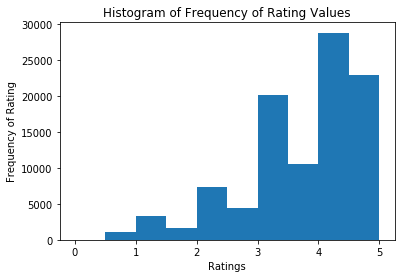

In [6]:
plt.hist(dataset['rating'],bins=np.arange(0, 5 + 0.5, 0.5))
plt.title('Histogram of Frequency of Rating Values')
plt.xlabel('Ratings')
plt.ylabel('Frequency of Rating')
plt.show()

### Question 3

In [7]:
movie_ids = dataset['movieId']
movie_ratings_dict = dict(Counter(movie_ids))

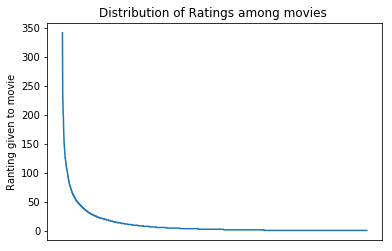

In [8]:
plt.plot(range(0,len(movie_ratings_dict.keys())), sorted(movie_ratings_dict.values(),reverse=True))
plt.title('Distribution of Ratings among movies ')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.ylabel('Ranting given to movie')
plt.show()

### Question 4

In [9]:
user_ids = dataset['userId']
user_ratings_dict = dict(Counter(user_ids))

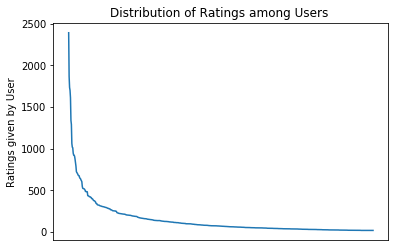

In [10]:
plt.plot(range(0,len(user_ratings_dict.keys())), sorted(user_ratings_dict.values(),reverse=True))
plt.title('Distribution of Ratings among Users ')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.ylabel('Ratings given by User')
plt.show()

### Question 5

In [11]:
sum(sorted(user_ratings_dict.values(),reverse=True)[:100])

55141

### Question 6

In [12]:
id_var = (dataset[['movieId','rating']].groupby('movieId',as_index=False)).var().fillna(0)
id_var_dict = dict(zip(list(id_var['movieId']), id_var['rating']))
var_list = list(dataset[['movieId','rating']].groupby('movieId').var()['rating'])

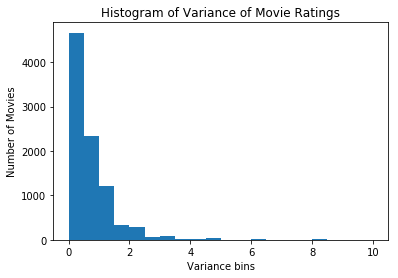

In [13]:
plt.hist(np.nan_to_num(var_list),bins=np.arange(min(var_list), max(var_list), 0.5))
plt.title('Histogram of Variance of Movie Ratings')
plt.ylabel('Number of Movies')
plt.xlabel('Variance bins')
plt.show()


In [14]:
def get_popular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    return [x for x in testset if x[1] in movie_ids]
def get_unpopular(movie_ratings_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    return [x for x in testset if x[1] in movie_ids]

def get_highvar(movie_ratings_dict, var_dict, testset):
    movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    movieids = [x for x in movieids if var_dict[x]>=2 ]
    return [x for x in testset if x[1] in movie_ids]
    

## 4.5 k-NN Collaborative Filtering

In [43]:
def do_kFold(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    sim_options = {'name': 'pearson_baseline'}
    kf = KFold(n_splits=splits, random_state=42)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for neigh in range_:
        print('Neighbors ',neigh)
        knn_model = KNNWithMeans( k=neigh, sim_options= sim_options)
        rmse_list=[]
        mae_list =[]
        #print(data_.)
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            knn_model.fit(trainset)
            predictions = knn_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[neigh]=sum(rmse_list)/len(rmse_list)
        mae_d[neigh]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d



In [46]:
def rmse_mae_plot(rmse_d,mae_d,xl):
    plt.plot(list(rmse_d.keys()),list(rmse_d.values()))
    plt.xlabel(xl)
    plt.ylabel('Average RMSE')
    plt.title(xl+ ' Vs Average RMSE')
    plt.show()
    
    plt.plot(list(mae_d.keys()),list(mae_d.values()))
    plt.xlabel(xl)
    plt.ylabel('Average MAE')
    plt.title(xl+' Vs Average MAE')
    plt.show()

### Question 10

In [18]:
reader = Reader(rating_scale=(1, 5))
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
r_d,m_d = do_kFold(total_data, range(2,101,2),'notrim',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster

Neighbors  2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearso

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.917414511786
Mean mae 0.695714977885
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.916163220397
Mean mae 0.695004212339
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915206844113
Mean mae 0.694049296741
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.915737890506
Mean mae 0.694926534529
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.914927423483
Mean mae 0.694262667578
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

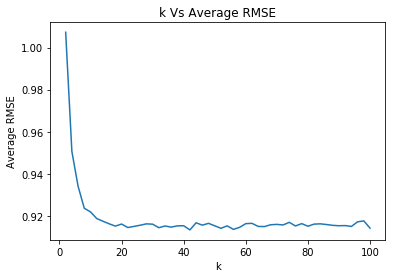

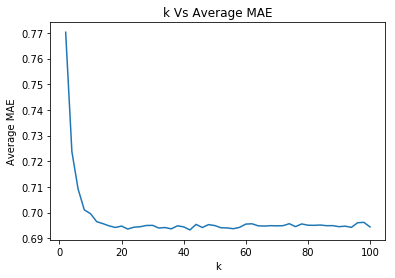

In [47]:
rmse_mae_plot(r_d,m_d,'k')

### Question 11

 k value =20


 RMSE = 0.9146735

### Question 12,13,14

In [20]:
rp_d, mp_d = do_kFold(total_data, range(2,101,2),'p',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster
rup_d,mup_d =do_kFold(total_data, range(2,101,2),'up',movie_ratings_dict)#TODO use 2 instead of 8. 8 is used to compute faster
rhv_d,mhv_d =do_kFold(total_data, range(2,101,2),'hv',movie_ratings_dict,id_var_dict= id_var_dict)#TODO use 2 instead of 8. 8 is used to compute faster

Neighbors  2
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearso

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.91653113219
Mean mae 0.694615320537
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Es

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.909762521246
Mean mae 0.690050890829
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912876383931
Mean mae 0.692897457148
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912721767265
Mean mae 0.692241260087
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.91103123977
Mean mae 0.691971271194
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Es

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.922791198939
Mean mae 0.700031260856
Neighbors  10
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912740854253
Mean mae 0.691751552389
Neighbors  36
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.913933079403
Mean mae 0.693037624516
Neighbors  50
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.911461348084
Mean mae 0.691728353475
Neighbors  76
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.913019049935
Mean mae 0.692506039302
Neighbors  90
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
D

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.914597087677
Mean mae 0.693308589553
Neighbors  16
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912250301779
Mean mae 0.691919980809
Neighbors  30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912390992915
Mean mae 0.692274999072
Neighbors  56
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.913692286703
Mean mae 0.693447071749
Neighbors  70
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
C

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Mean rmse 0.912440326129
Mean mae 0.692529042064
Neighbors  96
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
E

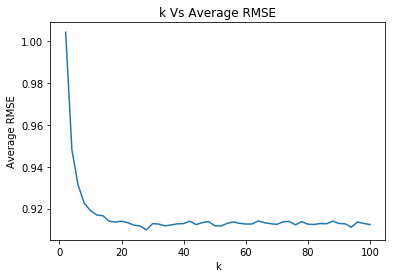

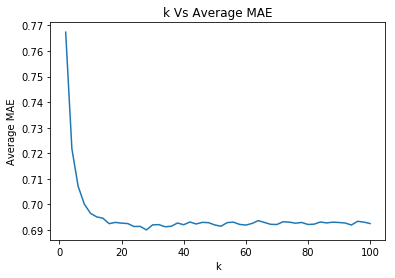

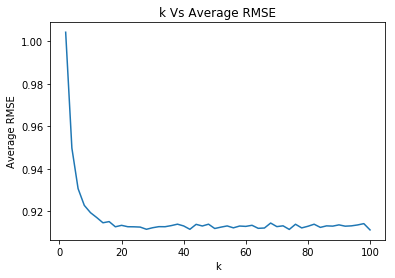

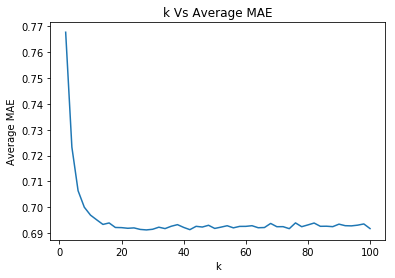

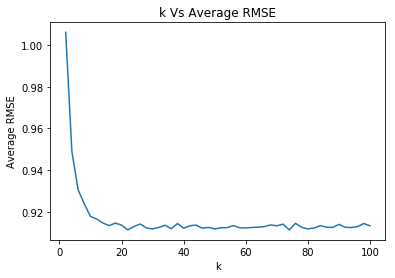

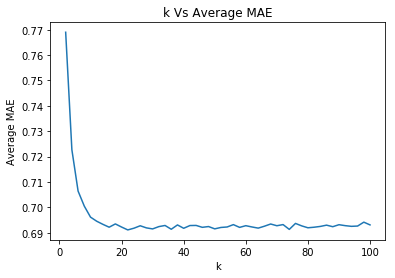

In [48]:
rmse_mae_plot(rp_d,mp_d,'k')
rmse_mae_plot(rup_d,mup_d,'k')
rmse_mae_plot(rhv_d,mhv_d,'k')

## NNNMF

In [44]:
def NMF_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits, random_state=42)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        nmf_model = NMF(n_factors = latent_factors,random_state=42)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict,id_var_dict,testset)
            nmf_model.fit(trainset)
            predictions = nmf_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

### Question 17

In [23]:
reader = Reader(rating_scale=(1, 5))
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
nmf_rmse , nmf_mae = NMF_filter(total_data, range(2,51,2),'notrim',movie_ratings_dict) #replace 8 with 2

Number of Latent Factors :  2
Mean rmse 1.17851205917
Mean mae 0.997385055579
Number of Latent Factors :  4
Mean rmse 1.06905073703
Mean mae 0.879784320187
Number of Latent Factors :  6
Mean rmse 1.01044635404
Mean mae 0.813669349014
Number of Latent Factors :  8
Mean rmse 0.974250545451
Mean mae 0.772478462765
Number of Latent Factors :  10
Mean rmse 0.957709884029
Mean mae 0.749478636538
Number of Latent Factors :  12
Mean rmse 0.946668203683
Mean mae 0.733984882528
Number of Latent Factors :  14
Mean rmse 0.939535567175
Mean mae 0.723189071502
Number of Latent Factors :  16
Mean rmse 0.937748674236
Mean mae 0.719035282588
Number of Latent Factors :  18
Mean rmse 0.937785492651
Mean mae 0.715195955056
Number of Latent Factors :  20
Mean rmse 0.938618171039
Mean mae 0.712883492777
Number of Latent Factors :  22
Mean rmse 0.939738038356
Mean mae 0.713233125077
Number of Latent Factors :  24
Mean rmse 0.945360199651
Mean mae 0.714668290775
Number of Latent Factors :  26
Mean rmse 0.9453

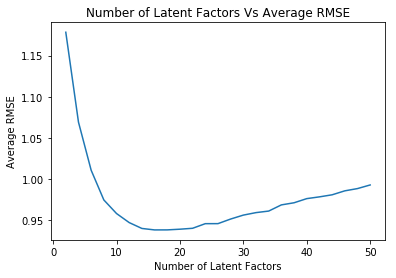

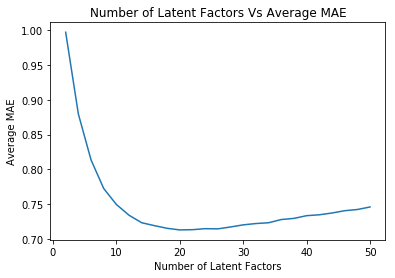

In [49]:
rmse_mae_plot(nmf_rmse,nmf_mae,'Number of Latent Factors')

### Question 18

In [25]:
print("Minimum Average RMSE : ",min(nmf_rmse.values()))
print("Minimum Average MAE : ",min(nmf_mae.values()))
best_n_factors = [k for k,v in nmf_rmse.items() if v == min(nmf_rmse.values())]
best_n_factors_nmf = best_n_factors[0]
print("Best number of latent factors : ",best_n_factors_nmf)

Minimum Average RMSE :  0.937748674236
Minimum Average MAE :  0.712883492777
Best number of latent factors :  16


### Question 19 20 21

In [26]:
print("-----Popular Movies Testset-----")
nmf_rmse_p , nmf_mae_p = NMF_filter(total_data, range(2,51,2),'p',movie_ratings_dict) #replace 8 with 2
print("-----Unpopular Movies Testset-----")
nmf_rmse_up , nmf_mae_up = NMF_filter(total_data, range(2,51,2),'up',movie_ratings_dict) #replace 8 with 2

-----Popular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 1.17398298876
Mean mae 0.992883073309
Number of Latent Factors :  4
Mean rmse 1.06653621013
Mean mae 0.877821486233
Number of Latent Factors :  6
Mean rmse 1.00651563162
Mean mae 0.810236310502
Number of Latent Factors :  8
Mean rmse 0.973681304009
Mean mae 0.772042788296
Number of Latent Factors :  10
Mean rmse 0.954346807138
Mean mae 0.746844278911
Number of Latent Factors :  12
Mean rmse 0.944178404357
Mean mae 0.732375268747
Number of Latent Factors :  14
Mean rmse 0.939202906128
Mean mae 0.722804501203
Number of Latent Factors :  16
Mean rmse 0.937154686143
Mean mae 0.718327709903
Number of Latent Factors :  18
Mean rmse 0.936339534328
Mean mae 0.713796874248
Number of Latent Factors :  20
Mean rmse 0.937822981597
Mean mae 0.712438909681
Number of Latent Factors :  22
Mean rmse 0.938223117265
Mean mae 0.711376102083
Number of Latent Factors :  24
Mean rmse 0.941919314628
Mean mae 0.713255316763
Number of Late

In [28]:
print("-----High Variance Movies Testset-----")
nmf_rmse_hv , nmf_mae_hv = NMF_filter(total_data, range(2,51,2),'hv',movie_ratings_dict,id_var_dict= id_var_dict) #replace 8 with 2

-----High Variance Movies Testset-----
Number of Latent Factors :  2
Mean rmse 1.17607771857
Mean mae 0.994876200798
Number of Latent Factors :  4
Mean rmse 1.06554117874
Mean mae 0.875906367066
Number of Latent Factors :  6
Mean rmse 1.00864983098
Mean mae 0.812309018122
Number of Latent Factors :  8
Mean rmse 0.972938444563
Mean mae 0.771587816965
Number of Latent Factors :  10
Mean rmse 0.953962343342
Mean mae 0.745982166521
Number of Latent Factors :  12
Mean rmse 0.942340867056
Mean mae 0.7312662957
Number of Latent Factors :  14
Mean rmse 0.93679094579
Mean mae 0.721232929001
Number of Latent Factors :  16
Mean rmse 0.934179170301
Mean mae 0.71499974063
Number of Latent Factors :  18
Mean rmse 0.93597954626
Mean mae 0.712878261913
Number of Latent Factors :  20
Mean rmse 0.936211405072
Mean mae 0.711467179339
Number of Latent Factors :  22
Mean rmse 0.940187849369
Mean mae 0.71260586772
Number of Latent Factors :  24
Mean rmse 0.942144229581
Mean mae 0.712458179196
Number of Late

-----Popular Movies Testset-----


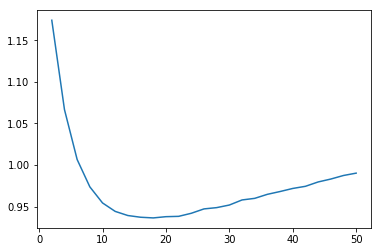

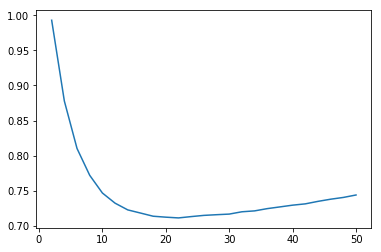

Minimum Average RMSE :  0.936339534328
Minimum Average MAE :  0.711376102083
-----Unpopular Movies Testset-----


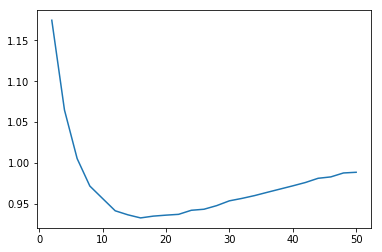

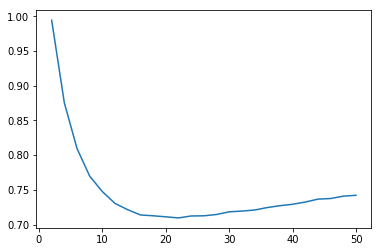

Minimum Average RMSE :  0.932707047568
Minimum Average MAE :  0.709605409313
-----High Variance Movies Testset-----


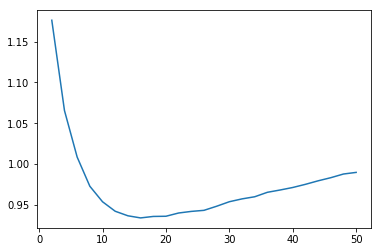

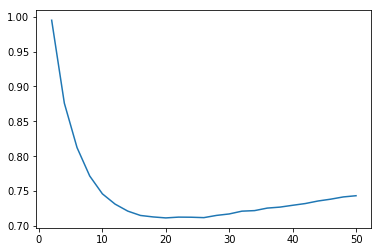

Minimum Average RMSE :  0.934179170301
Minimum Average MAE :  0.711467179339


In [29]:
print("-----Popular Movies Testset-----")
rmse_mae_plot(nmf_rmse_p,nmf_mae_p,'Number of Latent Factors')
print("Minimum Average RMSE : ",min(nmf_rmse_p.values()))
print("Minimum Average MAE : ",min(nmf_mae_p.values()))
print("-----Unpopular Movies Testset-----")
rmse_mae_plot(nmf_rmse_up,nmf_mae_up)
print("Minimum Average RMSE : ",min(nmf_rmse_up.values()))
print("Minimum Average MAE : ",min(nmf_mae_up.values()))
print("-----High Variance Movies Testset-----")
rmse_mae_plot(nmf_rmse_hv,nmf_mae_hv)
print("Minimum Average RMSE : ",min(nmf_rmse_hv.values()))
print("Minimum Average MAE : ",min(nmf_mae_hv.values()))

### Question 22

In [30]:
def plot_roc(fpr, tpr, roc_auc, threshold_value):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold value : ' + str(threshold_value))
    plt.legend(loc="lower right")
    plt.show()

In [31]:
def plot_roc_curves(testset,preds,thresholds_arr):
    for threshold_value in thresholds_arr:
        y_test = []
        y_preds = []
        for x in testset:
            if x[2] < threshold_value:
                y_test.append(0)
            else:
                y_test.append(1)
        for i in range(len(preds)):
            y_preds.append(preds[i][3])
        fpr, tpr, thresholds = roc_curve(y_test, y_preds)
        roc_auc = auc(fpr, tpr)
        plot_roc(fpr,tpr, roc_auc,threshold_value)

In [32]:
reader = Reader(rating_scale=(1, 5))
data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
train_set, test_set = train_test_split(data_roc, test_size = 0.1, random_state = 0)
roc_nmf_model = NMF(n_factors = 16,random_state=42)
roc_nmf_model.fit(train_set)
preds = roc_nmf_model.test(test_set)

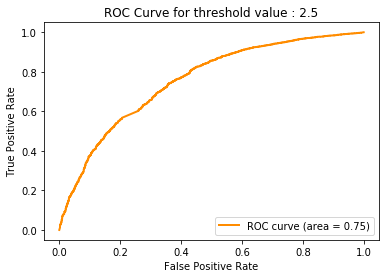

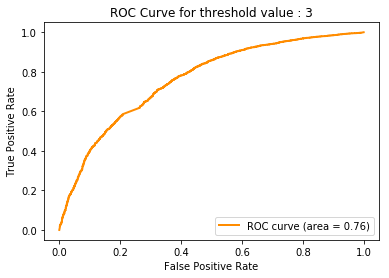

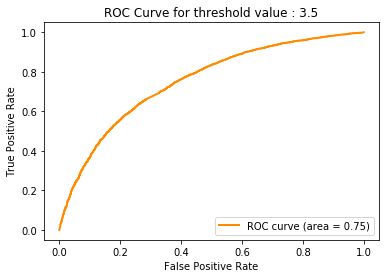

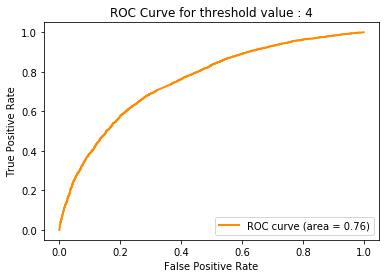

In [33]:
thresholds = [2.5,3,3.5,4]
plot_roc_curves(test_set,preds,thresholds)

### Question 23

#### TODO

## Matrix Factorization with bias

In [45]:
def SVD_filter(data_, range_,trimm,movie_ratings_dict,splits=10, id_var_dict=None):
    kf = KFold(n_splits=splits,random_state=42)
    reader = Reader(rating_scale=(1, 5))
    mae_d={}
    rmse_d={}
    for latent_factors in range_:
        print('Number of Latent Factors : ',latent_factors)
        svd_model = SVD(n_factors = latent_factors,random_state=42)
        rmse_list=[]
        mae_list =[]
        for trainset, testset in kf.split(data_):
            #print(testset)
            if(trimm=='p'):
                testset = get_popular(movie_ratings_dict,testset)
            elif(trimm=='up'):
                testset = get_unpopular(movie_ratings_dict,testset)
            elif(trimm=='hv'):
                testset = get_highvar(movie_ratings_dict, id_var_dict, testset)
            svd_model.fit(trainset)
            predictions = svd_model.test(testset,verbose=False)
            rmse_list.append(accuracy.rmse(predictions,verbose=False))
            mae_list.append(accuracy.mae(predictions,verbose=False))
        rmse_d[latent_factors]=sum(rmse_list)/len(rmse_list)
        mae_d[latent_factors]=sum(mae_list)/len(mae_list)
        print('Mean rmse',sum(rmse_list)/len(rmse_list))
        print('Mean mae',sum(mae_list)/len(mae_list))
    return rmse_d, mae_d

### Question23

In [ ]:

algo = NMF(n_factors = 20, random_state=42)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
trainset = data.build_full_trainset()
algo.fit(trainset)

v = algo.qi
top_ids = [[] for _ in range(20)]
for i in range(0,v.shape[1]):
    top_ids[i].append(np.argsort(v[:,i]))

In [ ]:
arr = dataset['movieId'].values
indexes = np.unique(arr,return_index = True)[1]
movie_list = [arr[i] for i in sorted(indexes)]


In [ ]:
movies_data = pd.read_csv('movies.csv')
movie_genre = movies_data[['movieId','genres']]

In [ ]:
for col_num in range(0,5):
    print("Genres for column ",col_num," : ")
    top10 = []
    genres = []
    movies_true_ids = []
    a = top_ids[col_num]
    for i in range(0,10):
        top10.append(a[0][i])
        movies_true_ids.append(movie_list[top10[i]])
        genres.append(list(movie_genre.iloc[movie_genre.index[movie_genre['movieId'] == movies_true_ids[i]]]['genres'].values))
    print(genres)

### Question 24

In [39]:
total_data = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
svd_rmse , svd_mae = SVD_filter(total_data, range(2,51,2),'notrim',movie_ratings_dict)

Number of Latent Factors :  2
Mean rmse 0.887815559698
Mean mae 0.683646178115
Number of Latent Factors :  4
Mean rmse 0.887271360793
Mean mae 0.683556275868
Number of Latent Factors :  6
Mean rmse 0.888534183655
Mean mae 0.684224813799
Number of Latent Factors :  8
Mean rmse 0.88787405283
Mean mae 0.683441347478
Number of Latent Factors :  10
Mean rmse 0.887719560906
Mean mae 0.683620947594
Number of Latent Factors :  12
Mean rmse 0.888523779123
Mean mae 0.68374131395
Number of Latent Factors :  14
Mean rmse 0.887889829485
Mean mae 0.68330128288
Number of Latent Factors :  16
Mean rmse 0.887514855959
Mean mae 0.682934371429
Number of Latent Factors :  18
Mean rmse 0.887793938115
Mean mae 0.682958851473
Number of Latent Factors :  20
Mean rmse 0.888333079597
Mean mae 0.683678822023
Number of Latent Factors :  22
Mean rmse 0.887585021817
Mean mae 0.682829646053
Number of Latent Factors :  24
Mean rmse 0.887740982218
Mean mae 0.682974647885
Number of Latent Factors :  26
Mean rmse 0.8880

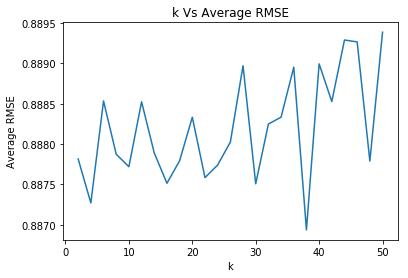

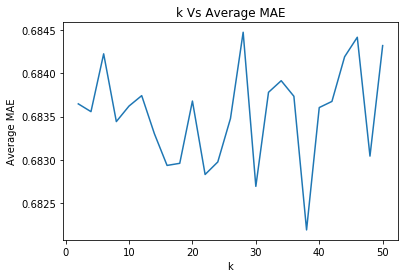

In [40]:
rmse_mae_plot(svd_rmse,svd_mae)

### Question 25

In [41]:
print("Minimum Average RMSE : ",min(svd_rmse.values()))
print("Minimum Average MAE : ",min(svd_mae.values()))
best_n_factors = [k for k,v in svd_rmse.items() if v == min(svd_rmse.values())]
best_n_factors_svd = best_n_factors[0]
print("Best number of latent factors : ",best_n_factors_svd)

Minimum Average RMSE :  0.886937081646
Minimum Average MAE :  0.682188815478
Best number of latent factors :  38


### Question 26,27,28

In [42]:
print("-----Popular Movies Testset-----")
svd_rmse_p , svd_mae_p = SVD_filter(total_data, range(2,51,2),'p',movie_ratings_dict) 

-----Popular Movies Testset-----
Number of Latent Factors :  2
Mean rmse 0.886874790181
Mean mae 0.682850784677
Number of Latent Factors :  4
Mean rmse 0.887016205919
Mean mae 0.683021773926
Number of Latent Factors :  6
Mean rmse 0.88699458483
Mean mae 0.68281000867
Number of Latent Factors :  8
Mean rmse 0.886861083393
Mean mae 0.682311230604
Number of Latent Factors :  10
Mean rmse 0.888038126015
Mean mae 0.683351533786
Number of Latent Factors :  12
Mean rmse 0.887420043214
Mean mae 0.683032479236
Number of Latent Factors :  14
Mean rmse 0.887993265277
Mean mae 0.682785452001
Number of Latent Factors :  16
Mean rmse 0.887171178749
Mean mae 0.682117293316
Number of Latent Factors :  18
Mean rmse 0.887624979116
Mean mae 0.68305553925
Number of Latent Factors :  20
Mean rmse 0.886449688766
Mean mae 0.68120257139
Number of Latent Factors :  22


KeyboardInterrupt: 

In [ ]:
print("-----Unpopular Movies Testset-----")
svd_rmse_up , svd_mae_up = SVD_filter(total_data, range(2,51,2),'up',movie_ratings_dict) 

In [ ]:
print("-----High Variance Movies Testset-----")
svd_rmse_hv , svd_mae_hv = SVD_filter(total_data, range(2,51,2),'hv',movie_ratings_dict, id_var_dict=id_var_dict)

In [ ]:
print("-----Popular Movies Testset-----")
rmse_mae_plot(svd_rmse_p,svd_mae_p)
print("Minimum Average RMSE : ",min(svd_rmse_p.values()))
print("Minimum Average MAE : ",min(svd_mae_p.values()))
print("-----Unpopular Movies Testset-----")
rmse_mae_plot(svd_rmse_up,svd_mae_up)
print("Minimum Average RMSE : ",min(svd_rmse_up.values()))
print("Minimum Average MAE : ",min(svd_mae_up.values()))
print("-----High Variance Movies Testset-----")
rmse_mae_plot(svd_rmse_hv,svd_mae_hv)
print("Minimum Average RMSE : ",min(svd_rmse_hv.values()))
print("Minimum Average MAE : ",min(svd_mae_hv.values()))

### Question 29

In [ ]:
data_roc = Dataset.load_from_df(dataset[['userId','movieId','rating']], reader)
train_set, test_set = train_test_split(data_roc, test_size = 0.1, random_state = 42)
roc_svd_model = SVD(n_factors = best_n_factors_svd,random_state=42)
roc_svd_model.fit(train_set)
preds = roc_svd_model.test(test_set)
thresholds = [2.5,3,3.5,4]
plot_roc_curves(test_set,preds,thresholds)

## Naive Collaborative filtering

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Function that returns mean rating of the user
def mean_rating(user):
    user_dataset = dataset.loc[dataset['userId'] == user]
    l = len(user_dataset)
    rating_sum = np.sum(user_dataset['rating'])
    return rating_sum/l

In [ ]:
mean_rating(1)

In [ ]:
def get_popular_dataset(testset):
    popular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>2]
    popular_movie_dataset = dataset.loc[dataset['movieId'].isin(popular_movieids)]
    return popular_movie_dataset

def get_unpopular_dataset(testset):
    unpopular_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]<=2]
    unpopular_movie_dataset = dataset.loc[dataset['movieId'].isin(unpopular_movieids)]
    return unpopular_movie_dataset

def get_highvar_dataset(testset):
    high_variance_movieids = [x[0] for x in movie_ratings_dict.items() if x[1]>=5]
    high_variance_movieids = [x for x in high_variance_movieids if id_var_dict[x]>=2 ]
    highvar_movie_dataset = dataset.loc[dataset['movieId'].isin(high_variance_movieids)]
    return highvar_movie_dataset

In [ ]:
def rmse(preds, true_vals):
    change = preds-true_vals
    rms = np.sqrt(np.sum(c*c for c in change))
    return rms/len(preds)

In [ ]:
def naive_cf(df, subset):
    error = []
    for i in range(10):
        kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
        result = next(kf.split(df), None)
        train = df.iloc[result[0]]
        test =  df.iloc[result[1]]
        if subset == 'entire':
            test2 = test
        if subset == 'popular':
            test2 = get_popular_dataset(test)
        if subset == 'unpopular':
            test2 = get_unpopular_dataset(test)
        if subset == 'highvar':
            test2 = get_highvar_dataset(test)
        predictions = [mean_rating(i) for i in test2['userId']]
        error.append(rmse(predictions, test2['rating']))
    print("RMSE 10-fold cross validation: ", np.sum(error)/10)

In [ ]:
# Question 30
print("Entire dataset")
naive_cf(dataset, "entire")

In [ ]:
# Question 31
print("Popular movie dataset")
naive_cf(dataset, "popular")

In [ ]:
# Question 32
print("Unpopular movie dataset")
naive_cf(dataset, "unpopular")

In [ ]:
# Question 33
print("High variance movie dataset")
naive_cf(dataset, "highvar")

In [ ]:
# Question 34 
# TODO
def plot_roc_combined(testset,preds,threshold_value):
    y_test = []
    y_preds = []
    for x in testset:
        if x[2] < threshold_value:
            y_test.append(0)
        else:
            y_test.append(1)
    for i in range(len(preds)):
        y_preds.append(preds[i][3])
        
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    #plot_roc(fpr,tpr, roc_auc,threshold_value)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for threshold value : ' + str(threshold_value))
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
user_ids = dataset['userId'].unique()

In [ ]:
user_movie_rating = dataset[['userId', 'movieId', 'rating']].fillna(0)

In [ ]:
dataset.head()

In [ ]:
user_movie_rating_new = user_movie_rating[user_movie_rating.rating > 3]   # threshold for ground truth values = 3

In [ ]:
user_movie_rating_new['movieId'].nunique()

In [ ]:
user_movies_dict = {}  # ground truth values for users
for uid in user_ids:
    df = user_movie_rating_new[user_movie_rating_new.userId == uid]
    if uid in user_movies_dict:
        user_movies_dict[uid].append(df.movieId)
    else:
        user_movies_dict[uid] = df.movieId

In [ ]:
user_movies_dict = {k: v for k, v in user_movies_dict.items() if len(v) != 0}  # removes users with 0 ratings

In [ ]:
def getPrecision(recommendations, uid, user_movies_dict=user_movies_dict):
    rec_common = [x for x in recommendations if x in user_movies_dict[uid]]
    precision = float(len(rec_common)/len(recommendations))
    return precision

def getRecall(recommendations, uid, user_movies_dict=user_movies_dict):
    rec_common = [x for x in recommendations if x in user_movies_dict[uid]]
    recall = float(len(rec_common)/len(user_movies_dict[uid]))
    return recall

In [ ]:
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

def getS_KNN(trainset, testset, t):
    sim_options = {'name': 'pearson_baseline'}
    algo = KNNWithMeans(k=20, sim_options=sim_options)   # k = 20 (from Q11)
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

def getS_NNMF(trainset, testset, t):
    algo = NMF(n_factors = 16,random_state=42)     # Best number . of latent factors = 16
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

def getS_MF(trainset, testset, t):
    algo = SVD(n_factors = 2,random_state=42)   # Best number of latent factors = 2
    algo.fit(trainset)
    # Than predict ratings for all pairs (u, i) that are NOT in the training set.
    predictions = algo.test(testset)
    top_n = get_top_n(predictions, n=t)
    
    S = {}
    # Recommended items for each user
    for uid, user_ratings in top_n.items():
        S[uid] = [iid for (iid, _) in user_ratings]
    return S

In [ ]:
from surprise.model_selection import KFold

def precision_recall(tvals, algo):
    avg_precision_t = []
    avg_recall_t = []
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(user_movie_rating_new[['userId','movieId','rating']], reader)
    kf = KFold(n_splits=10,random_state=42)
    for t in tvals:
        precisions = []
        recalls = []
        for trainset, testset in kf.split(data):
            user_precisions = []
            user_recalls = []
            if algo == 'knn':
                S = getS_KNN(trainset, testset, t)
            if algo == 'nnmf':
                S = getS_NNMF(trainset, testset, t)
            if algo == 'mf':
                S = getS_MF(trainset, testset, t)
            
            uids = [x[0] for x in testset]
            for uid in uids:
                user_precisions.append(getPrecision(S[uid], uid))
                user_recalls.append(getRecall(S[uid], uid))
            
            fold_precision = sum(user_precisions)/len(user_precisions)
            fold_recall = sum(user_recalls)/len(user_recalls)
            precisions.append(fold_precision)
            recalls.append(fold_recall)
        precision_t = sum(precisions)/len(precisions)
        recall_t = sum(recalls)/len(recalls)
        avg_precision_t.append(precision_t)
        avg_recall_t.append(recall_t)
    return avg_precision_t, avg_recall_t

In [ ]:
def plot_func(x, y, xlabel, ylabel, title):
    plt.figure()
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [ ]:
tvals = range(1,25,1)

In [ ]:
precision_knn, recall_knn = precision_recall(tvals, "knn")

In [ ]:
plot_func(tvals, precision_knn, "Size of recommendation list", "Precision", "KNN")

In [ ]:
plot_func(tvals, recall_knn, "Size of recommendation list", "Recall", "KNN")

In [ ]:
plot_func(recall_knn, precision_knn, "Recall", "Precision", "KNN")

In [ ]:
precision_nnmf, recall_nnmf = precision_recall(tvals, "nnmf")

In [ ]:
plot_func(tvals, precision_nnmf, "Size of recommendation list", "Precision", "NNMF")

In [ ]:
plot_func(tvals, recall_nnmf, "Size of recommendation list", "Recall", "NNMF")

In [ ]:
plot_func(recall_nnmf, precision_nnmf, "Recall", "Precision", "NNMF")

In [ ]:
precision_mf, recall_mf = precision_recall(tvals, "mf")

In [ ]:
plot_func(tvals, precision_mf, "Size of recommendation list", "Precision", "MF")

In [ ]:
plot_func(tvals, recall_mf, "Size of recommendation list", "Recall", "MF")

In [ ]:
plot_func(recall_mf, precision_mf, "Recall", "Precision", "MF")